In [18]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
wheat = pd.read_csv('/Users/hp/Desktop/python/wheat_types.txt',sep=';')

In [30]:
data = wheat.iloc[:,0:7].values
wheatype = wheat.iloc[:,7].values

In [32]:
model = tree.DecisionTreeClassifier(criterion='entropy')

[Text(219.7125, 201.90857142857143, 'X[6] <= 5.576\nentropy = 1.585\nsamples = 210\nvalue = [70, 70, 70]'),
 Text(146.475, 170.84571428571428, 'X[0] <= 13.41\nentropy = 1.093\nsamples = 141\nvalue = [69, 2, 70]'),
 Text(104.625, 139.78285714285715, 'X[5] <= 4.168\nentropy = 0.65\nsamples = 84\nvalue = [14, 0, 70]'),
 Text(83.7, 108.72, 'X[0] <= 12.71\nentropy = 0.971\nsamples = 35\nvalue = [14, 0, 21]'),
 Text(41.85, 77.65714285714284, 'X[6] <= 4.724\nentropy = 0.722\nsamples = 25\nvalue = [5, 0, 20]'),
 Text(20.925, 46.59428571428572, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(62.775000000000006, 46.59428571428572, 'X[5] <= 1.538\nentropy = 0.276\nsamples = 21\nvalue = [1, 0, 20]'),
 Text(41.85, 15.531428571428563, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(83.7, 15.531428571428563, 'entropy = 0.0\nsamples = 20\nvalue = [0, 0, 20]'),
 Text(125.55000000000001, 77.65714285714284, 'X[3] <= 5.105\nentropy = 0.469\nsamples = 10\nvalue = [9, 0, 1]'),
 Text(104.625,

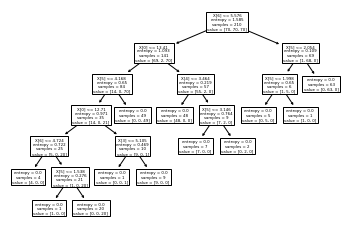

In [33]:
tree.plot_tree(model.fit(data,wheatype))

In [34]:
model.score(data,wheatype)

1.0

In [36]:
x = data
y = wheatype
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25,random_state=100) #Defining %25 for test

In [37]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
predicted = model.predict(x_test)

In [39]:
conf = confusion_matrix(y_test,predicted)
print(conf)

[[12  0  0]
 [ 1 17  0]
 [ 4  0 19]]


In [40]:
print(accuracy_score(y_test,predicted)) #Accuracy of Decision Tree

0.9056603773584906


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


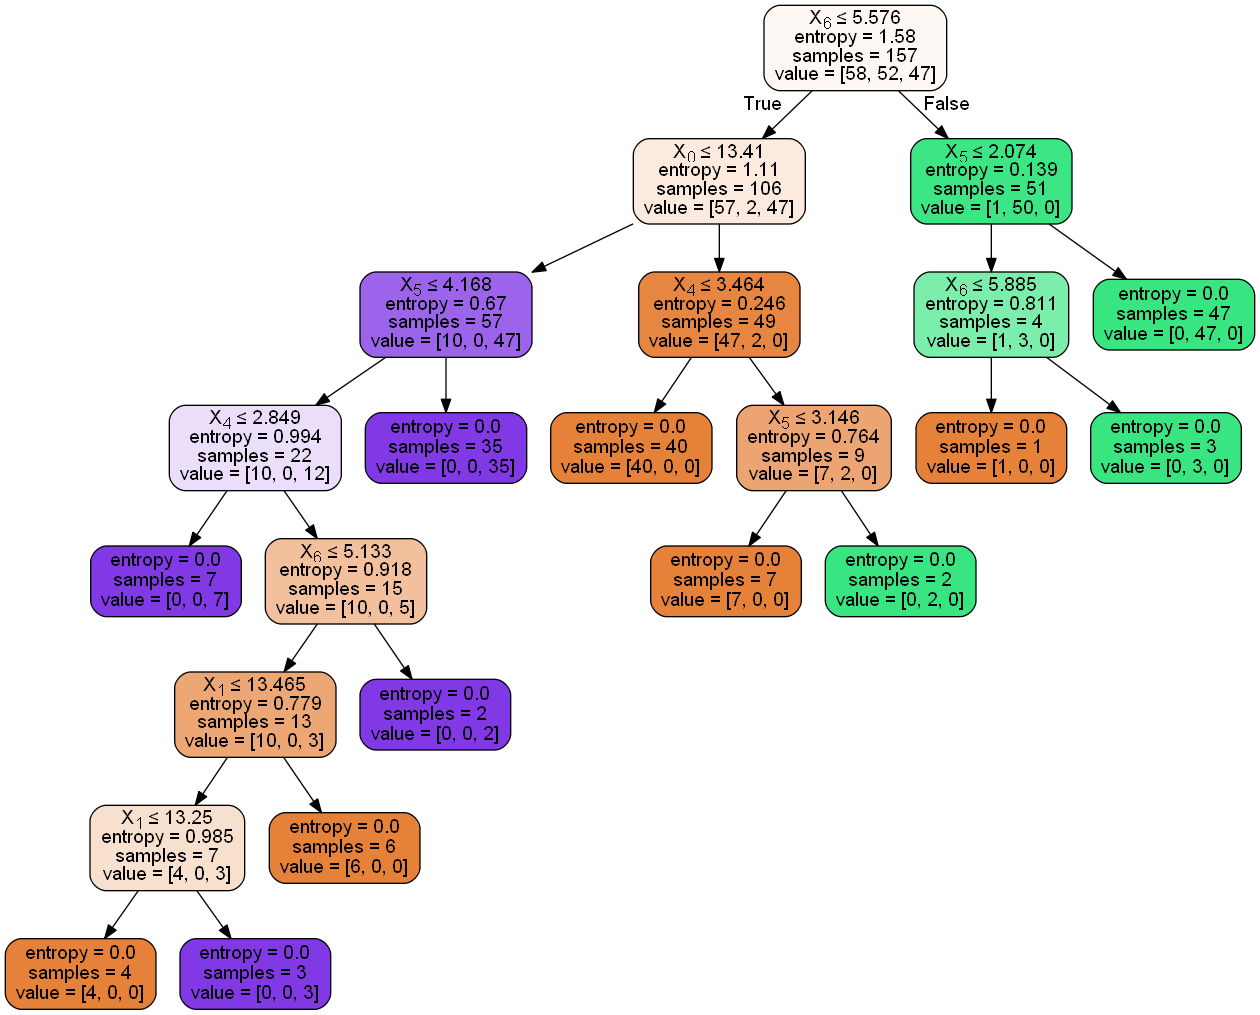

In [41]:
#Visualizing the Decision Tree
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(model,
out_file=dot_data,
filled=True, # Whether to fill in the boxes with colours.
rounded=True, # Whether to round the corners of the boxes.
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())